In [3]:
%pip install pycaret

# Pycaret on Titanic dataset

In this notebook we use pycaret to find the best model for predicting the survivability of our tests. We tried different iterations for getting the best features to predict and also the best model.

### 1. No encoding, normalizing and cleaning
  Here we feed pycaret the whole dataset and ket it figure out how to do all of the encoding, normalizing and cleaning by itself. All of this without giving an "expert" insight on the data.

### 2. No encoding, normalizing but with giving an "expert" take on the features to use.
  Here we extract usefull data from the features and give only the most meaningful data to pycaret but without cleaning and encoding, ...

### 3. "Expert" feature selection, encoding, normalization and cleaning.
  Here we did all the preprocessing ourselves and let pycaret look for the best model to use.

# Importing titanic dataset and needed packages

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from pycaret.classification import *

In [5]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/CloudAI/titanic3.xlsx')

# 1 No encoding, normalizing and cleaning

## 1.1 Set up

Here we test what Pycaret can do with all the data, it will normalize, standardize and clean the data itself without any expert take on the dataset.

pycaret also handles the splitting of the dataset

First we do the setup where pycaret will show us the settings it uses to normalize, standardize and clean the data.

In [6]:
# initialize setup
classification_setup = setup(df, target='survived', train_size=0.8, session_id=8)

,Description,Value
0,Session id,8
1,Target,survived
2,Target type,Binary
3,Original data shape,"(1309, 14)"
4,Transformed data shape,"(1309, 16)"
5,Transformed train set shape,"(1047, 16)"
6,Transformed test set shape,"(262, 16)"
7,Ordinal features,1
8,Numeric features,6
9,Categorical features,7


We can see the settings it applies when comparing the models and the preprocessing it does.

## 1.2 Comparing the models
pycaret will compare all different models on our dataset and store the best one in a variable.

In [ ]:
# compare models
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9446,0.9871,0.8875,0.9647,0.9242,0.8807,0.8829,0.3480
ridge,Ridge Classifier,0.9407,0.0000,0.8575,0.9856,0.9165,0.8710,0.8767,0.1780
et,Extra Trees Classifier,0.8377,0.9227,0.6325,0.9202,0.7439,0.6327,0.6600,0.3290
knn,K Neighbors Classifier,0.7373,0.7875,0.6150,0.6770,0.6413,0.4353,0.4392,0.1890
rf,Random Forest Classifier,0.7231,0.9535,0.2825,0.9771,0.4254,0.3183,0.4230,0.3710
svm,SVM - Linear Kernel,0.6361,0.0000,0.6100,0.6926,0.5166,0.2631,0.3484,0.1740
nb,Naive Bayes,0.6179,0.8725,0.0000,0.0000,0.0000,0.0000,0.0000,0.3300
dt,Decision Tree Classifier,0.6179,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3530
ada,Ada Boost Classifier,0.6179,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3230
gbc,Gradient Boosting Classifier,0.6179,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4440


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In this case the Logistic Regression is the winner.

## 1.3 Creating the best model

Now we can create the model that came out as the best

In [ ]:
# create model
model = create_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9714,0.9958,0.9500,0.9744,0.9620,0.9391,0.9393
1,0.9333,0.9792,0.8500,0.9714,0.9067,0.8552,0.8598
2,0.9333,0.9827,0.8500,0.9714,0.9067,0.8552,0.8598
3,0.9238,0.9838,0.8500,0.9444,0.8947,0.8353,0.8381
4,0.9429,0.9860,0.8750,0.9722,0.9211,0.8765,0.8795
5,0.9714,0.9946,0.9250,1.0000,0.9610,0.9385,0.9403
6,0.9429,0.9723,0.9000,0.9474,0.9231,0.8777,0.8784
7,0.9231,0.9895,0.8500,0.9444,0.8947,0.8344,0.8373
8,0.9519,0.9930,0.9250,0.9487,0.9367,0.8980,0.8981


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

The output we see are the results on different parts of the training set.

## 1.4 Predicting on the test set

In [ ]:
# predict on test set
predictions = predict_model(model)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9351,0.9623,0.8600,0.9663,0.9101,0.8596,0.8631


# 2 No encoding, normalizing but with giving an "expert" take on the features to use.

## 2.1 The following preprocessing has been done by us without any encoding or cleaning

In [ ]:
df2 = df.copy()
df2['title'] = df2['name'].str.extract(r',\s*([^\.]*)\.', expand=False).str.strip()
columns_to_drop = ['cabin', 'home.dest', 'embarked', 'name', 'ticket']
df2.drop(columns=columns_to_drop, axis=1, inplace=True)
df2

,pclass,survived,sex,age,sibsp,parch,fare,boat,body,title
0,1,1,female,29.0000,0,0,211.3375,2,NaN,Miss
1,1,1,male,0.9167,1,2,151.5500,11,NaN,Master
2,1,0,female,2.0000,1,2,151.5500,NaN,NaN,Miss
3,1,0,male,30.0000,1,2,151.5500,NaN,135.0,Mr
4,1,0,female,25.0000,1,2,151.5500,NaN,NaN,Mrs
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,female,14.5000,1,0,14.4542,NaN,328.0,Miss
1305,3,0,female,NaN,1,0,14.4542,NaN,NaN,Miss
1306,3,0,male,26.5000,0,0,7.2250,NaN,304.0,Mr
1307,3,0,male,27.0000,0,0,7.2250,NaN,NaN,Mr


## 2.2 Set up

Here we test what Pycaret can do with all the data, it will normalize, standardize and clean the data itself without any expert take on the dataset.

pycaret also handles the splitting of the dataset

First we do the setup where pycaret will show us the settings it uses to normalize, standardize and clean the data.

In [ ]:
# initialize setup
classification_setup = setup(df2, target='survived', train_size=0.8, session_id=8)

,Description,Value
0,Session id,8
1,Target,survived
2,Target type,Binary
3,Original data shape,"(1309, 10)"
4,Transformed data shape,"(1309, 25)"
5,Transformed train set shape,"(1047, 25)"
6,Transformed test set shape,"(262, 25)"
7,Ordinal features,1
8,Numeric features,6
9,Categorical features,3


We can see the settings it applies when comparing the models and the preprocessing it does.

## 2.3 Comparing the models
pycaret will compare all different models on our dataset and store the best one in a variable.

In [ ]:
# compare models
best_model2 = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.9532,0.0000,0.8950,0.9813,0.9357,0.8991,0.9019,0.1490
lda,Linear Discriminant Analysis,0.9532,0.9859,0.8950,0.9813,0.9357,0.8991,0.9019,0.1230
et,Extra Trees Classifier,0.9522,0.9805,0.9425,0.9332,0.9375,0.8989,0.8993,0.3950
gbc,Gradient Boosting Classifier,0.9513,0.9851,0.9175,0.9537,0.9347,0.8959,0.8970,0.2560
rf,Random Forest Classifier,0.9503,0.9857,0.9375,0.9334,0.9350,0.8948,0.8954,0.6160
lr,Logistic Regression,0.9436,0.9846,0.8825,0.9675,0.9226,0.8785,0.8812,1.0820
lightgbm,Light Gradient Boosting Machine,0.9436,0.9820,0.9100,0.9414,0.9246,0.8796,0.8809,0.3780
ada,Ada Boost Classifier,0.9417,0.9847,0.9175,0.9297,0.9233,0.8763,0.8767,0.2330
xgboost,Extreme Gradient Boosting,0.9398,0.9786,0.9050,0.9357,0.9196,0.8715,0.8724,0.3350
dt,Decision Tree Classifier,0.9379,0.9375,0.9225,0.9191,0.9194,0.8690,0.8708,0.1220


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Seems like there is a new winner after our preprocessing with a tiny bump in performance. The Ridge Classifier has the highest accuracy now. I don't understand why the AUC is 0...

## 2.4 Creating the best model

Now we can create the model that came out as the best

In [ ]:
# create model
model2 = create_model(best_model2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9714,0.0000,0.9500,0.9744,0.9620,0.9391,0.9393
1,0.9333,0.0000,0.8500,0.9714,0.9067,0.8552,0.8598
2,0.9429,0.0000,0.8500,1.0000,0.9189,0.8752,0.8821
3,0.9619,0.0000,0.9000,1.0000,0.9474,0.9176,0.9208
4,0.9524,0.0000,0.8750,1.0000,0.9333,0.8966,0.9014
5,0.9714,0.0000,0.9250,1.0000,0.9610,0.9385,0.9403
6,0.9524,0.0000,0.9000,0.9730,0.9351,0.8976,0.8993
7,0.9423,0.0000,0.8750,0.9722,0.9211,0.8758,0.8788
8,0.9519,0.0000,0.9250,0.9487,0.9367,0.8980,0.8981


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

The output we see are the results on different parts of the training set. Most if not all of these got a little better with the feature selection we did. Again, I do not understand why the AUC is 0

## 2.5 Predicting on the test set

In [ ]:
# predict on test set
predictions2 = predict_model(model2)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.9504,0.9369,0.8800,0.9888,0.9312,0.8926,0.8963


The model that won performs better than the one it chose without any preprocessing

# 3 "Expert" feature selection, encoding, normalization and cleaning.

## 3.1 The following preprocessing has been done by us which contains: cleaning, encoding, feature selections and normalization.

In [7]:
#making a copy of the original dataset
df3 = df.copy()
#dropping the age column because it contains too many null values to impute
df3.dropna(subset=['age'], inplace=True)
#dropping any rows with null values for fare (only 1)
df3.dropna(subset=['fare'], inplace=True)
#extracting the title of each person on board from the name column
df3['title'] = df3['name'].str.extract(r',\s*([^\.]*)\.', expand=False).str.strip()
# create dictionary to map titles to encoded values
title_encoding = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rev': 5, 'Dr': 5, 'Col': 5, 'Mlle': 6, 'Ms': 6, 'Major': 6, 'Capt': 6, 'Sir': 7, 'Dona': 7, 'Jonkheer': 7, 'the Countess': 7, 'Don': 8, 'Mme': 8, 'Lady': 8}
# map titles to encoded values
df3['title_encoded'] = df3['title'].map(title_encoding)
columns_to_encode = ['sex']
df3 = pd.get_dummies(df3, columns=columns_to_encode)

df3['boat'].fillna(-999, inplace=True)
df3['body'].fillna(-999, inplace=True)

# convert the series to numeric type
df3['boat'] = pd.to_numeric(df3['boat'], errors='coerce')

columns_to_drop = ['cabin', 'home.dest', 'embarked', 'name', 'ticket', 'title']
df3.drop(columns=columns_to_drop, axis=1, inplace=True)
# select numerical columns to normalize
numerical_cols = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'boat', 'body', 'title_encoded', 'sex_male', 'sex_female']
# create scaler object
scaler = StandardScaler()
# fit and transform selected columns
df3[numerical_cols] = scaler.fit_transform(df3[numerical_cols])
df3

,pclass,survived,age,sibsp,parch,fare,boat,body,title_encoded,sex_female,sex_male
0,-1.434601,1,-0.059228,-0.551897,-0.501462,3.135243,1.320890,-0.357055,0.152718,1.301268,-1.301268
1,-1.434601,1,-2.011855,0.544553,1.880484,2.061972,1.339498,-0.357055,1.878024,-0.768481,0.768481
2,-1.434601,0,-1.936534,0.544553,1.880484,2.061972,-0.748661,-0.357055,0.152718,1.301268,-1.301268
3,-1.434601,0,0.010302,0.544553,1.880484,2.061972,-0.748661,2.710703,-0.709934,-0.768481,0.768481
4,-1.434601,0,-0.337347,0.544553,1.880484,2.061972,-0.748661,-0.357055,1.015371,1.301268,-1.301268
...,...,...,...,...,...,...,...,...,...,...,...
1301,0.943128,0,1.088014,-0.551897,-0.501462,-0.528869,-0.748661,3.189533,-0.709934,-0.768481,0.768481
1304,0.943128,0,-1.067411,0.544553,-0.501462,-0.399094,-0.748661,3.232817,0.152718,1.301268,-1.301268
1306,0.943128,0,-0.233052,-0.551897,-0.501462,-0.528869,-0.748661,3.167891,-0.709934,-0.768481,0.768481
1307,0.943128,0,-0.198288,-0.551897,-0.501462,-0.528869,-0.748661,-0.357055,-0.709934,-0.768481,0.768481


## 3.2 Set up

Here we test what Pycaret can do with all the data, it will normalize, standardize and clean the data itself without any expert take on the dataset.

pycaret also handles the splitting of the dataset

First we do the setup where pycaret will show us the settings it uses to normalize, standardize and clean the data (even though we did our best already...).

In [8]:
# initialize setup
classification_setup = setup(df3, target='survived', train_size=0.8, session_id=8)

,Description,Value
0,Session id,8
1,Target,survived
2,Target type,Binary
3,Original data shape,"(1045, 11)"
4,Transformed data shape,"(1045, 11)"
5,Transformed train set shape,"(836, 11)"
6,Transformed test set shape,"(209, 11)"
7,Numeric features,10
8,Rows with missing values,6.2%
9,Preprocess,True


We can see the settings it applies when comparing the models and the preprocessing it does.

## 3.3 Comparing the models
pycaret will compare all different models on our dataset and store the best one in a variable.

In [9]:
# compare models
best_model3 = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9832,0.9985,0.9649,0.9940,0.9791,0.9652,0.9656,0.7520
xgboost,Extreme Gradient Boosting,0.9796,0.9973,0.9678,0.9827,0.9750,0.9578,0.9582,0.0640
lightgbm,Light Gradient Boosting Machine,0.9796,0.9973,0.9678,0.9824,0.9749,0.9578,0.9581,0.4770
gbc,Gradient Boosting Classifier,0.9784,0.9976,0.9678,0.9796,0.9735,0.9553,0.9557,0.1450
rf,Random Forest Classifier,0.9749,0.9951,0.9649,0.9743,0.9692,0.9480,0.9485,0.2070
ada,Ada Boost Classifier,0.9749,0.9942,0.9562,0.9824,0.9688,0.9478,0.9484,0.1170
et,Extra Trees Classifier,0.9689,0.9931,0.9649,0.9599,0.9621,0.9357,0.9361,0.1700
svm,SVM - Linear Kernel,0.9641,0.0000,0.9620,0.9543,0.9572,0.9264,0.9278,0.0240
dt,Decision Tree Classifier,0.9605,0.9608,0.9620,0.9443,0.9526,0.9187,0.9196,0.0230
knn,K Neighbors Classifier,0.9545,0.9771,0.9299,0.9587,0.9435,0.9054,0.9065,0.0660


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

The Logisitc regression is back on top after performing all the preprocessing.

## 3.4 Creating the best model

Now we can create the model that came out as the best

In [10]:
# create model
model3 = create_model(best_model3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9881,1.0000,0.9714,1.0000,0.9855,0.9754,0.9757
1,0.9881,0.9988,0.9714,1.0000,0.9855,0.9754,0.9757
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9881,0.9994,0.9706,1.0000,0.9851,0.9752,0.9755
4,0.9643,0.9971,0.9412,0.9697,0.9552,0.9255,0.9258
5,0.9762,0.9994,0.9706,0.9706,0.9706,0.9506,0.9506
6,0.9880,1.0000,0.9706,1.0000,0.9851,0.9750,0.9753
7,0.9880,0.9982,0.9706,1.0000,0.9851,0.9750,0.9753
8,0.9759,0.9964,0.9412,1.0000,0.9697,0.9497,0.9509


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

The output we see are the results on different parts of the training set. Most if not all of these got a little better with our preprocessing.

## 3.5 Predicting on the test set

In [11]:
# predict on test set
predictions3 = predict_model(model3)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9569,0.9902,0.9294,0.9634,0.9461,0.9103,0.9107


The model that won performs the best out of all our testing by using our preprocessed data.

# 4 Plotting the results for our best model

## Area under the curve
The AUC (Area Under the Curve) chart is a graph that shows the performance of a classification model at all classification thresholds by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at different classification thresholds.


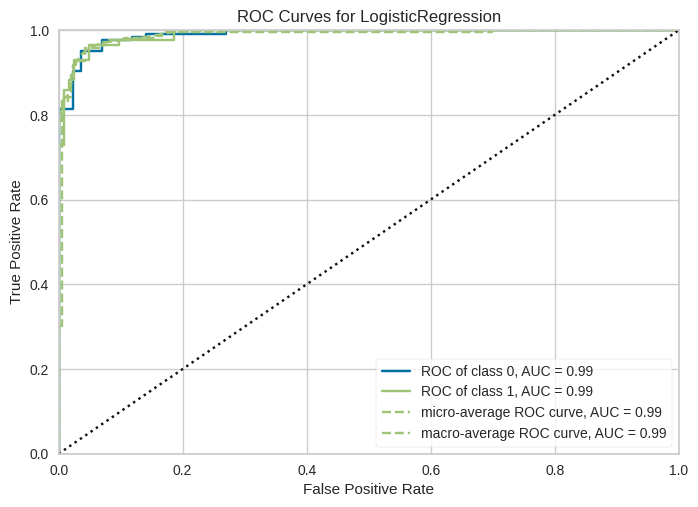

In [13]:
plot_model(model3, plot = "auc")

## Confusion matrix
Here we can compare the actual and predicted classes of the data.

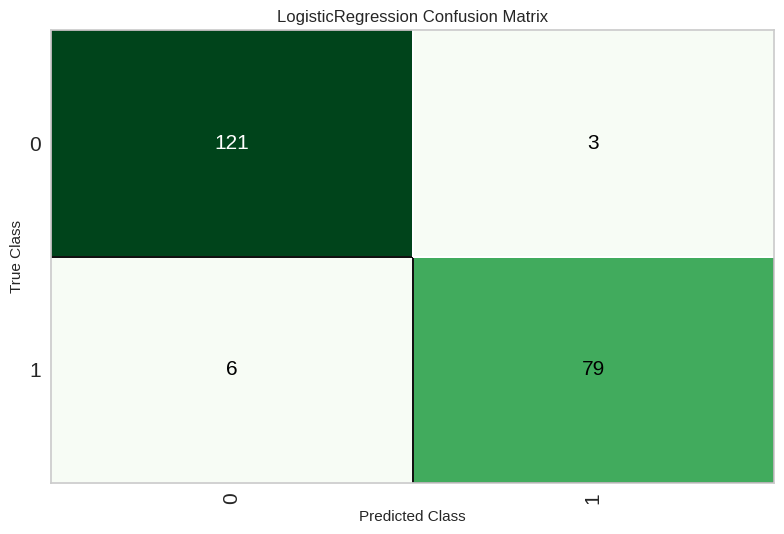

In [14]:
plot_model(model3, plot = "confusion_matrix")

## Threshold

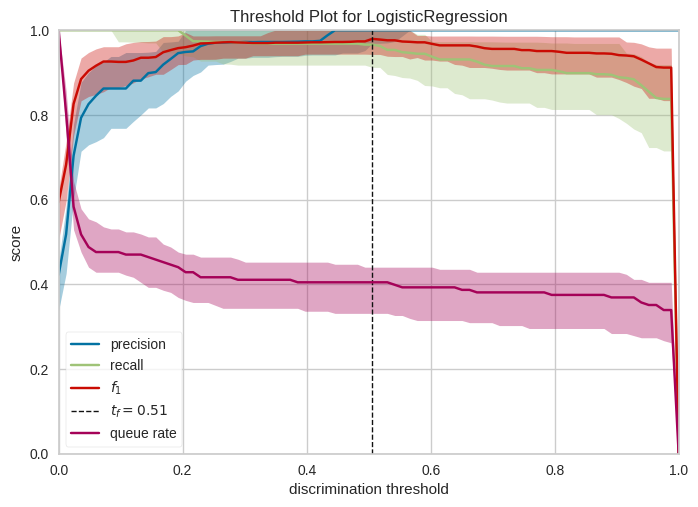

In [15]:
plot_model(model3, plot = "threshold")

## Manifold plot
This plot shows the dimensionality of the data. In this case not dimensional at all since we're dealing with a binary classification problem.

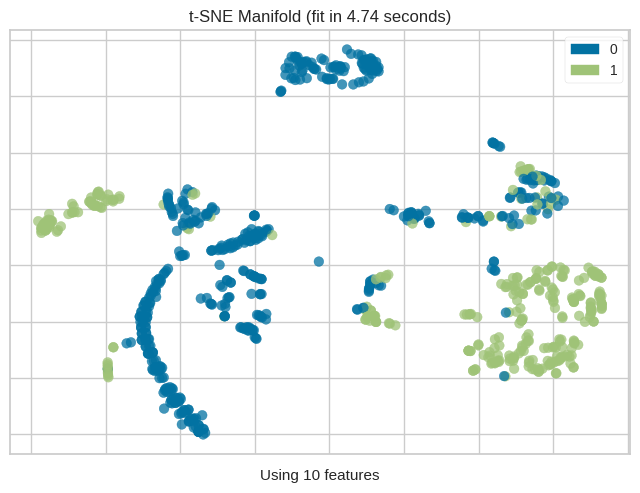

In [17]:
plot_model(model3, plot = "manifold")

# 5 Summary
The winner is clearly the Logistic regression since it performed the best in 2 of our 3 tries.